<a href="https://colab.research.google.com/github/tanaypandya1818/LoanRisk/blob/main/Loan_Default_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Estimation

In [ ]:
import pandas as pd

df = pd.read_excel(
    "/content/Bank_Personal_Loan_Modelling.xlsx",
    sheet_name="Data"
)

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Dataset Description:

Scope: 5,000 customer records with 13 features (including the target variable “Personal Loan”)

Age: Age in completed years
Experience: Years of professional experience
Income: Annual income (in $1,000s)
CCAvg: Average monthly credit card expenditure (in $1,000s)
Mortgage: Mortgage amount (in $1,000s)
Ordinal Scale (ranked categories):
Education: Education level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)
Family: Number of family members (1, 2, 3, 4)
Nominal/ Binary:
Securities Account: Ownership of a securities account (0 = no, 1 = yes)
CD Account: Ownership of a certificate of deposit account (0 = no, 1 = yes)
Online: Use of internet banking (0 = no, 1 = yes)
CreditCard: Use of a bank-issued credit card (0 = no, 1 = yes)

Target Variable (binary):
Personal Loan: Whether the customer accepted the offered personal loan (0 = no, 1 = yes)

In [ ]:
df.isna().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


Missing Data Check

Why: To ensure data quality and confirm whether imputation is needed before further EDA and modeling.

What we learned: There are no missing values in the dataset. No imputation or data cleaning related to missing values is required, allowing us to proceed directly to data visualization and distribution analysis.

Implications for next steps: We can now proceed with:

Data Preprocessing and Model training

Checking the class balance:

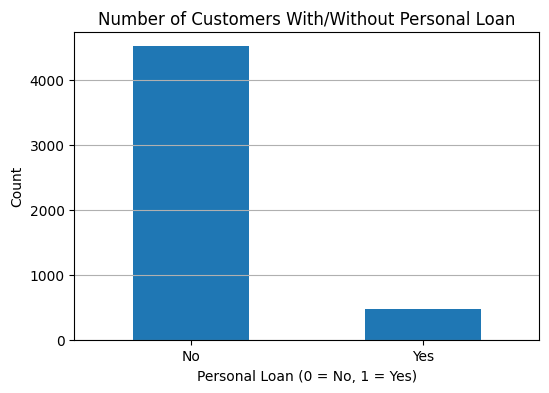

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Personal Loan'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title('Number of Customers With/Without Personal Loan')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y')
plt.show()


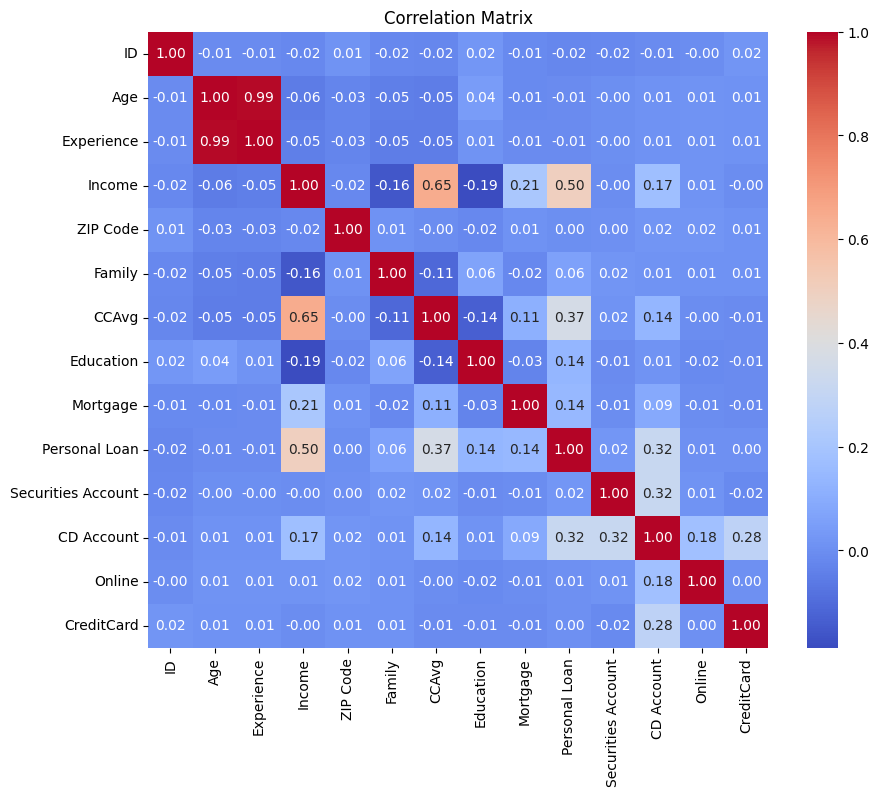

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing:

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop ID and ZIP Code columns
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [ ]:
# Convert categorical variables
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [ ]:
# One-hot encode
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# Handle outliers (cap at 99th percentile)
for col in ['Income', 'CCAvg', 'Mortgage']:
    upper_limit = df_encoded[col].quantile(0.99)
    df_encoded[col] = np.where(df_encoded[col] > upper_limit, upper_limit, df_encoded[col])

In [ ]:
# Split features and binary target
X_cls = df_encoded.drop(columns=['Personal Loan'])
y_cls = df_encoded['Personal Loan']

# Split for classifier
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train classifier to get probability scores
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_cls_train, y_cls_train)
probs = clf.predict_proba(X_cls)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Target Transformation: use predicted probability as regression target
X_reg = X_cls.copy()
y_reg = probs

In [ ]:
# Train-test split for regression
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modeling Pipeline
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

In [ ]:
# Store results
results = {}

for name, model in models.items():
    if "Linear" in name or "Ridge" in name:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] Start training from score 0.093746


In [ ]:
results

{'Linear Regression': {'RMSE': np.float64(0.21766558671378658),
  'MAE': 0.15495212730588906,
  'R2': 0.46225436630735717},
 'Ridge Regression': {'RMSE': np.float64(0.21766724182090064),
  'MAE': 0.1549277336712164,
  'R2': 0.4622461883494067},
 'Random Forest': {'RMSE': np.float64(0.04067395034881179),
  'MAE': 0.009202036869785797,
  'R2': 0.9812228334913153},
 'XGBoost': {'RMSE': np.float64(0.04956474662237189),
  'MAE': 0.012258411385118961,
  'R2': 0.9721167683601379},
 'LightGBM': {'RMSE': np.float64(0.045768664762272225),
  'MAE': 0.01651935533862803,
  'R2': 0.9762242714077448},
 'CatBoost': {'RMSE': np.float64(0.04374048611033731),
  'MAE': 0.01469793241422497,
  'R2': 0.9782847636963328}}

In [ ]:
# Convert predicted probabilities to percentages
best_model = models['CatBoost']
final_preds = best_model.predict(X_test) * 100

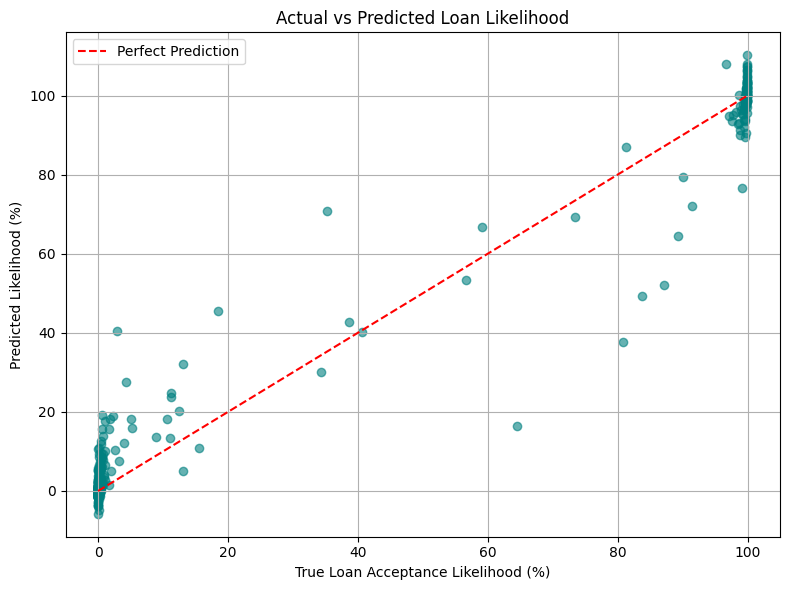

In [ ]:
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)
y_true = y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_true * 100, y_pred * 100, alpha=0.6, color='teal')
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')
plt.xlabel("True Loan Acceptance Likelihood (%)")
plt.ylabel("Predicted Likelihood (%)")
plt.title("Actual vs Predicted Loan Likelihood")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

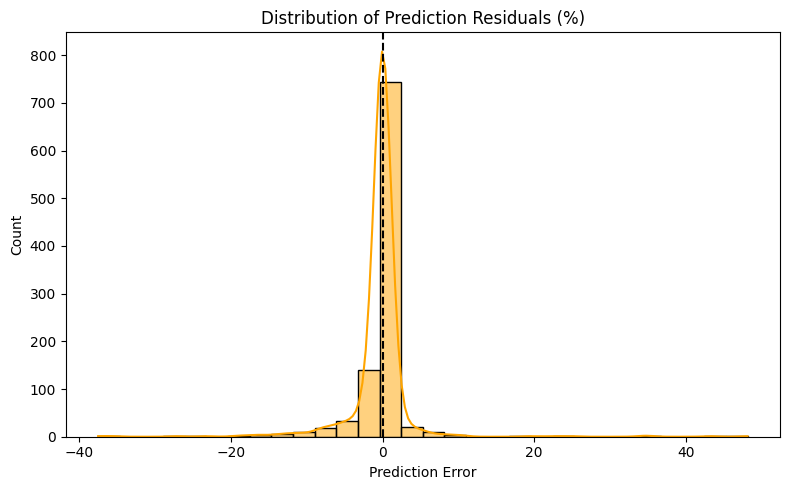

In [ ]:
import seaborn as sns

residuals = (y_true - y_pred) * 100
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Prediction Residuals (%)")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


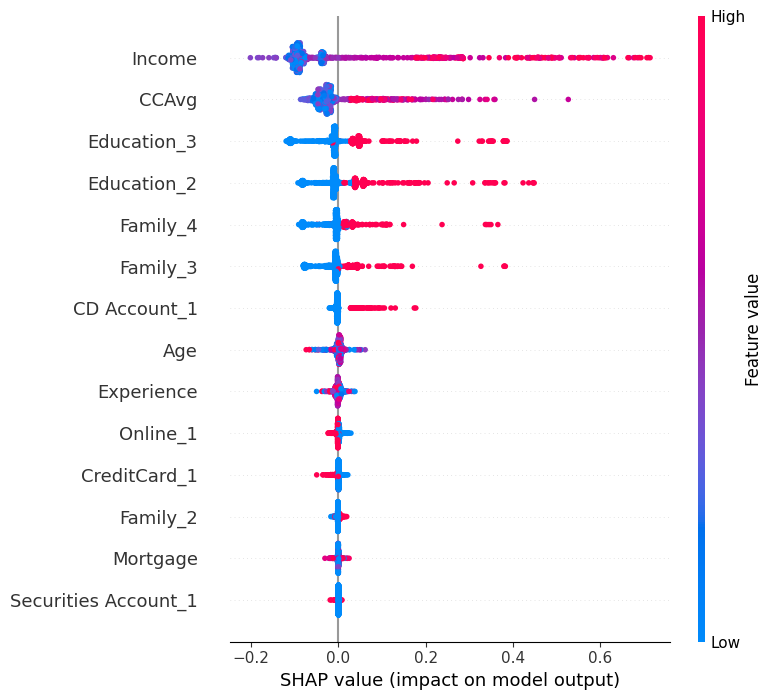

In [ ]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="dot")  # or "bar"


In [ ]:
# Convert to DataFrame
df_results = pd.DataFrame(results).T.reset_index()
df_results.columns = ['Model', 'RMSE', 'MAE', 'R2 Score']

# Sort by R2 Score (or any metric)
df_results = df_results.sort_values(by='R2 Score', ascending=False)

# Display as a clean table
from IPython.display import display
display(df_results.style.set_caption("Model Performance Comparison")
                     .format({'RMSE': '{:.3f}', 'MAE': '{:.3f}', 'R2 Score': '{:.2f}'})
                     .background_gradient(cmap='YlGnBu', subset=['RMSE', 'MAE', 'R2 Score']))

,Model,RMSE,MAE,R2 Score
2,Random Forest,0.041,0.009,0.98
5,CatBoost,0.044,0.015,0.98
4,LightGBM,0.046,0.017,0.98
3,XGBoost,0.050,0.012,0.97
0,Linear Regression,0.218,0.155,0.46
1,Ridge Regression,0.218,0.155,0.46


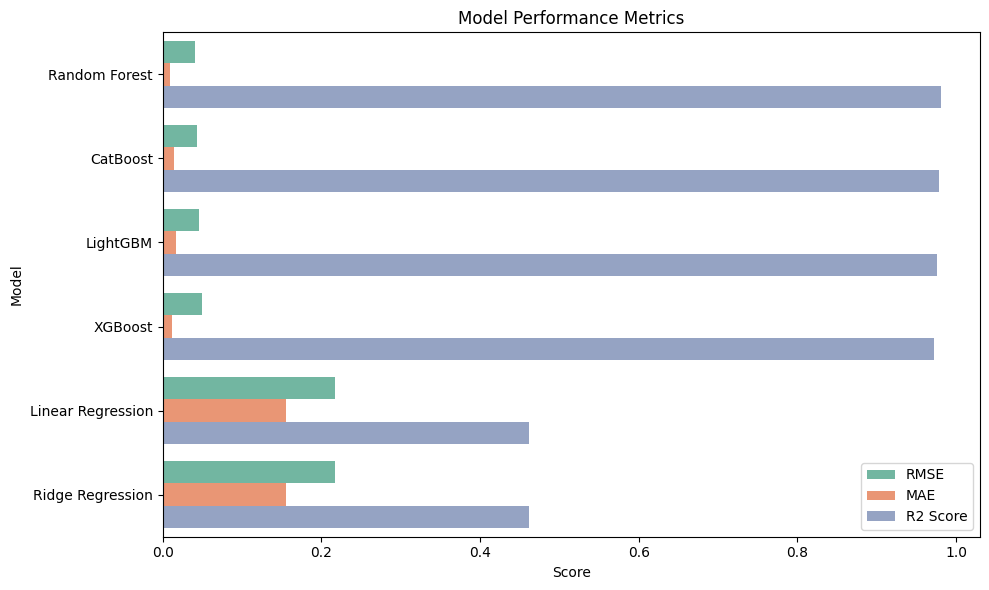

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Score', y='Model', hue='Metric', palette='Set2')
plt.title("Model Performance Metrics")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()